<a href="https://colab.research.google.com/github/Janya-Sharma-22/-algo-efficiency-mini-project-JanyaSharma/blob/main/lab_assignment_01_%5B2301201220%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install memory_profiler
import time
import sys
import random

from memory_profiler import memory_usage

import numpy as np
import matplotlib.pyplot as plt

In [9]:
def measure_time(func, *args):
    start = time.time()
    func(*args)
    end = time.time()
    return end - start

def measure_memory(func, *args):
    mem_usage = memory_usage((func, args), max_iterations=1)
    return max(mem_usage) - min(mem_usage)

In [10]:
# Naïve recursive Fibonacci
def fib_recursive(n):
    if n <= 1:
        return n
    return fib_recursive(n-1) + fib_recursive(n-2)

# Dynamic Programming Fibonacci
def fib_dp(n):
    if n <= 1:
        return n
    dp = [0, 1]
    for i in range(2, n+1):
        dp.append(dp[-1] + dp[-2])
    return dp[n]

In [11]:
# Merge Sort
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr)//2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
    return arr

In [12]:
# Quick Sort
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr)//2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

In [13]:
# Insertion Sort
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr

In [14]:
# Bubble Sort
def bubble_sort(arr):
    n = len(arr)
    for i in range(n-1):
        for j in range(n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

In [15]:

# Selection Sort
def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

In [17]:
# Binary Search
def binary_search(arr, x):
    low, high = 0, len(arr)-1
    while low <= high:
        mid = (low+high)//2
        if arr[mid] == x:
            return mid
        elif arr[mid] < x:
            low = mid+1
        else:
            high = mid-1
    return -1

In [18]:
def test_algorithm(func, inputs, generator_func=None):
    times = []
    for n in inputs:
        if generator_func:
            data = generator_func(n)
            t = measure_time(func, data.copy())
        else:
            t = measure_time(func, n)
        times.append(t)
    return times

def plot_graph(inputs, results, labels, title, xlabel="Input Size", ylabel="Time (s)"):
    for i, res in enumerate(results):
        plt.plot(inputs, res, label=labels[i])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

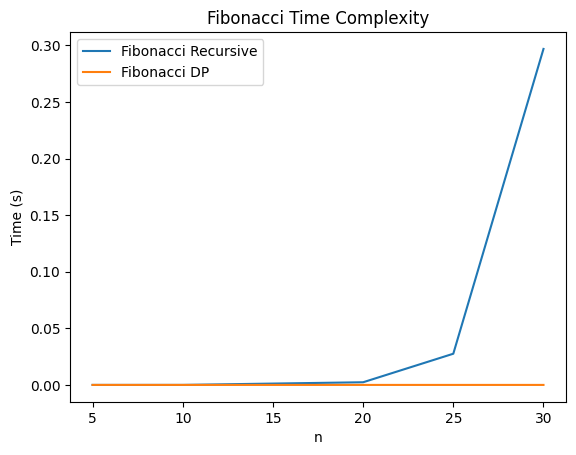

In [19]:
inputs = [5, 10, 20, 25, 30]

fib_recursive_times = [measure_time(fib_recursive, n) for n in inputs]
fib_dp_times = [measure_time(fib_dp, n) for n in inputs]

plot_graph(inputs,
           [fib_recursive_times, fib_dp_times],
           ["Fibonacci Recursive", "Fibonacci DP"],
           "Fibonacci Time Complexity",
           xlabel="n", ylabel="Time (s)")

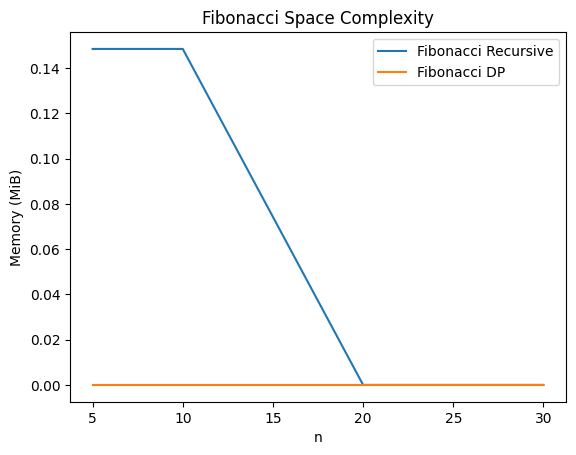

In [23]:
fib_recursive_mem = [measure_memory(fib_recursive, n) for n in inputs]
fib_dp_mem = [measure_memory(fib_dp, n) for n in inputs]

plot_graph(inputs,
           [fib_recursive_mem, fib_dp_mem],
           ["Fibonacci Recursive", "Fibonacci DP"],
           "Fibonacci Space Complexity",
           xlabel="n", ylabel="Memory (MiB)")

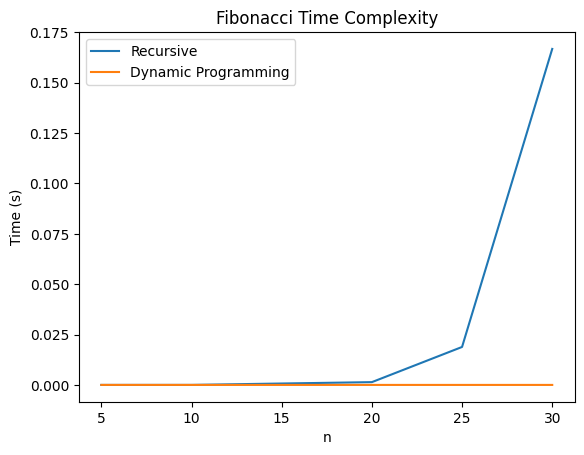

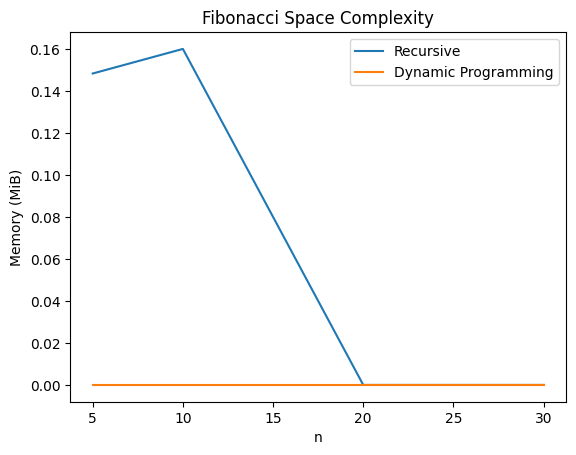

In [20]:
inputs = [5, 10, 20, 25, 30]

# Time profiling
fib_recursive_times = [measure_time(fib_recursive, n) for n in inputs]
fib_dp_times = [measure_time(fib_dp, n) for n in inputs]

# Memory profiling
fib_recursive_mem = [measure_memory(fib_recursive, n) for n in inputs]
fib_dp_mem = [measure_memory(fib_dp, n) for n in inputs]

# Plot Time
plot_graph(inputs,
           [fib_recursive_times, fib_dp_times],
           ["Recursive", "Dynamic Programming"],
           "Fibonacci Time Complexity",
           xlabel="n", ylabel="Time (s)")

# Plot Space
plot_graph(inputs,
           [fib_recursive_mem, fib_dp_mem],
           ["Recursive", "Dynamic Programming"],
           "Fibonacci Space Complexity",
           xlabel="n", ylabel="Memory (MiB)")

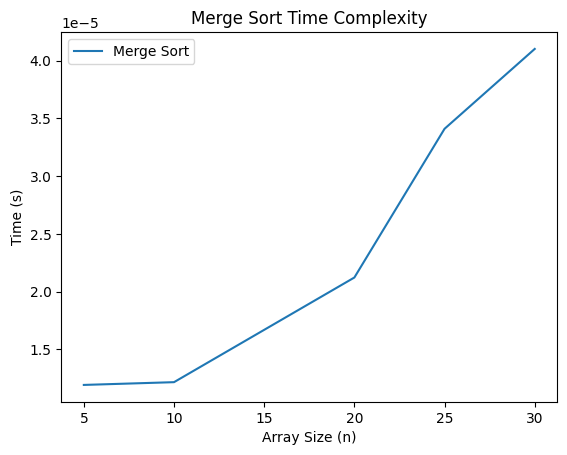

In [21]:
def random_array(n):
    return [random.randint(0, 1000) for _ in range(n)]
    inputs = [100, 200, 400, 600, 800]
merge_times = [measure_time(merge_sort, random_array(n)) for n in inputs]

plot_graph(inputs, [merge_times],
           ["Merge Sort"],
           "Merge Sort Time Complexity",
           xlabel="Array Size (n)", ylabel="Time (s)")

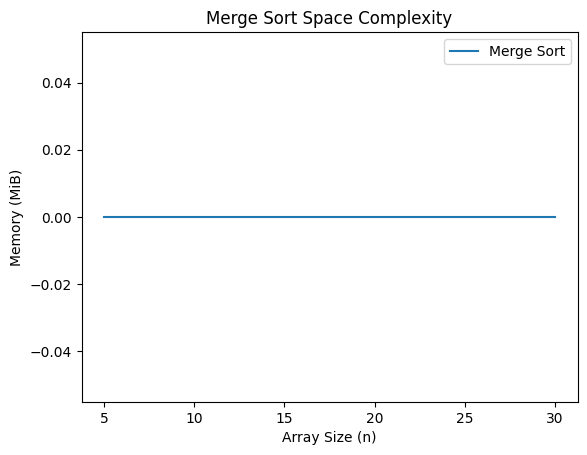

In [22]:
merge_mem = [measure_memory(merge_sort, random_array(n)) for n in inputs]

plot_graph(inputs, [merge_mem],
           ["Merge Sort"],
           "Merge Sort Space Complexity",
           xlabel="Array Size (n)", ylabel="Memory (MiB)")

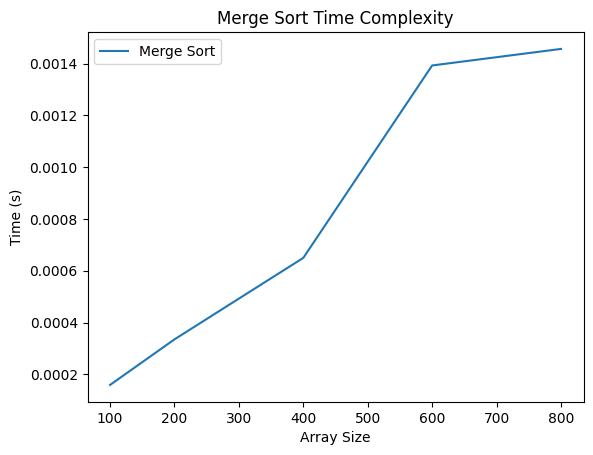

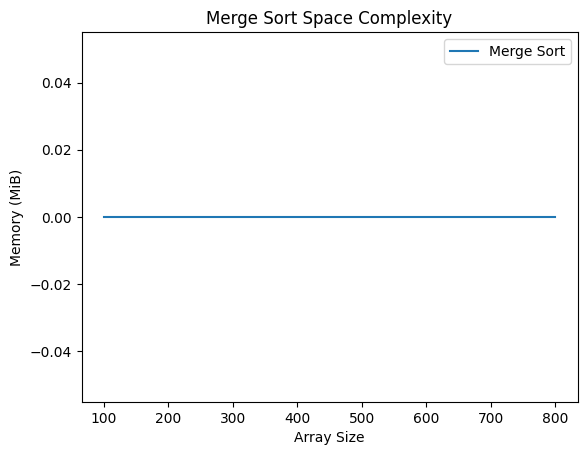

In [23]:
inputs = [100, 200, 400, 600, 800]

merge_times = [measure_time(merge_sort, random_array(n)) for n in inputs]
merge_mem = [measure_memory(merge_sort, random_array(n)) for n in inputs]

# Plot Time
plot_graph(inputs, [merge_times],
           ["Merge Sort"],
           "Merge Sort Time Complexity",
           xlabel="Array Size", ylabel="Time (s)")

# Plot Space
plot_graph(inputs, [merge_mem],
           ["Merge Sort"],
           "Merge Sort Space Complexity",
           xlabel="Array Size", ylabel="Memory (MiB)")

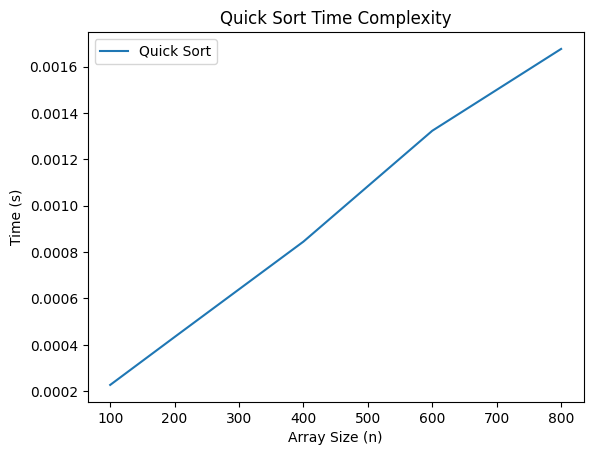

In [24]:
quick_times = [measure_time(quick_sort, random_array(n)) for n in inputs]

plot_graph(inputs, [quick_times],
           ["Quick Sort"],
           "Quick Sort Time Complexity",
           xlabel="Array Size (n)", ylabel="Time (s)")

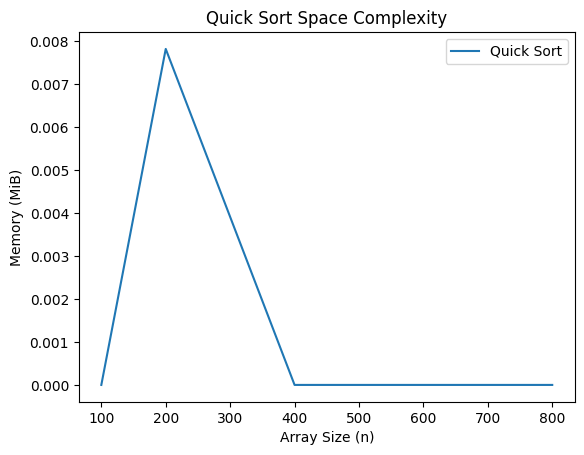

In [25]:
quick_mem = [measure_memory(quick_sort, random_array(n)) for n in inputs]

plot_graph(inputs, [quick_mem],
           ["Quick Sort"],
           "Quick Sort Space Complexity",
           xlabel="Array Size (n)", ylabel="Memory (MiB)")

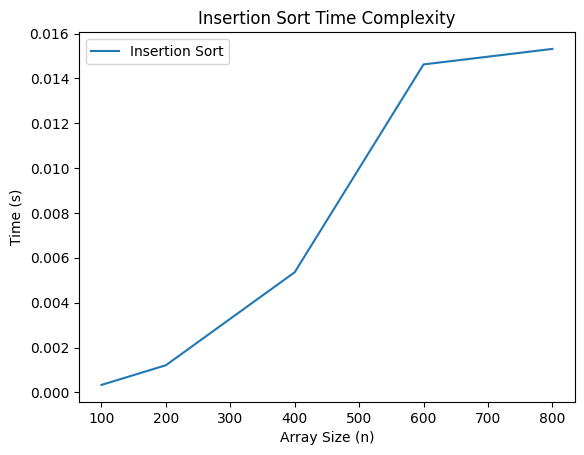

In [26]:
insert_times = [measure_time(insertion_sort, random_array(n)) for n in inputs]

plot_graph(inputs, [insert_times],
           ["Insertion Sort"],
           "Insertion Sort Time Complexity",
           xlabel="Array Size (n)", ylabel="Time (s)")

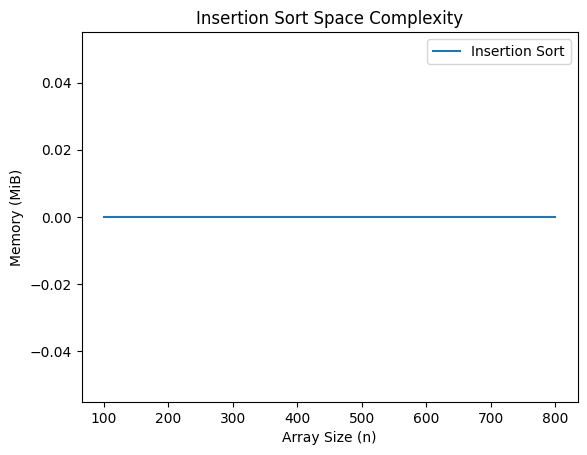

In [27]:
insert_mem = [measure_memory(insertion_sort, random_array(n)) for n in inputs]

plot_graph(inputs, [insert_mem],
           ["Insertion Sort"],
           "Insertion Sort Space Complexity",
           xlabel="Array Size (n)", ylabel="Memory (MiB)")

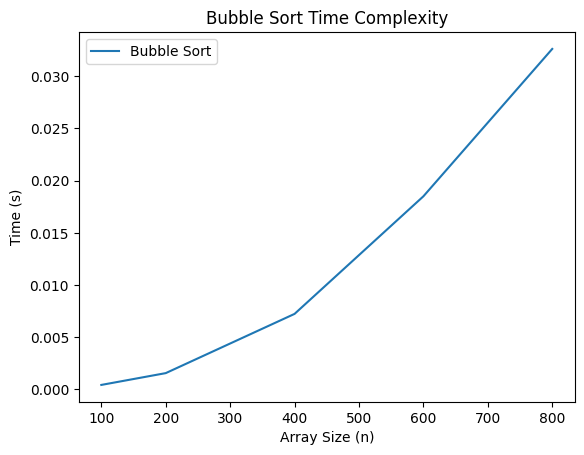

In [28]:
bubble_times = [measure_time(bubble_sort, random_array(n)) for n in inputs]

plot_graph(inputs, [bubble_times],
           ["Bubble Sort"],
           "Bubble Sort Time Complexity",
           xlabel="Array Size (n)", ylabel="Time (s)")

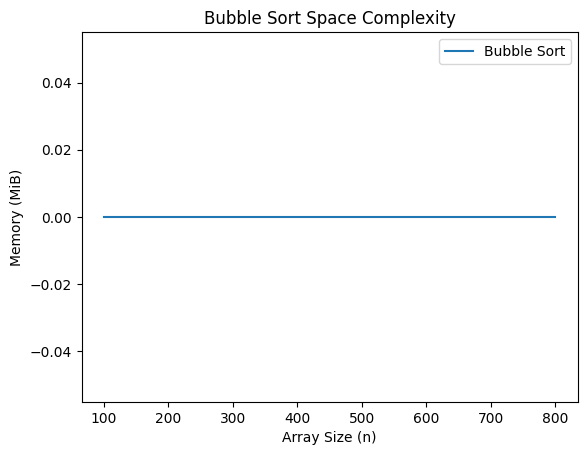

In [29]:
bubble_mem = [measure_memory(bubble_sort, random_array(n)) for n in inputs]

plot_graph(inputs, [bubble_mem],
           ["Bubble Sort"],
           "Bubble Sort Space Complexity",
           xlabel="Array Size (n)", ylabel="Memory (MiB)")

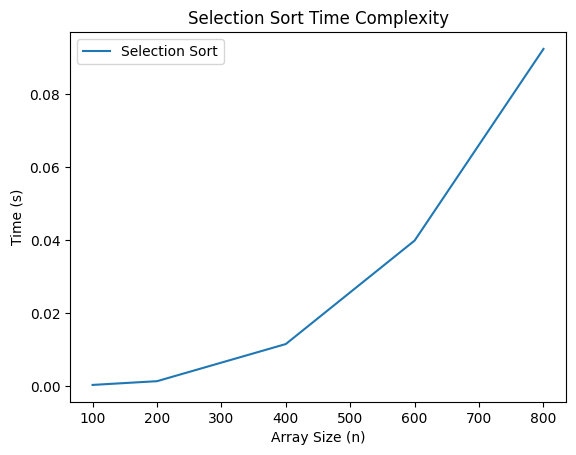

In [30]:
selection_times = [measure_time(selection_sort, random_array(n)) for n in inputs]

plot_graph(inputs, [selection_times],
           ["Selection Sort"],
           "Selection Sort Time Complexity",
           xlabel="Array Size (n)", ylabel="Time (s)")

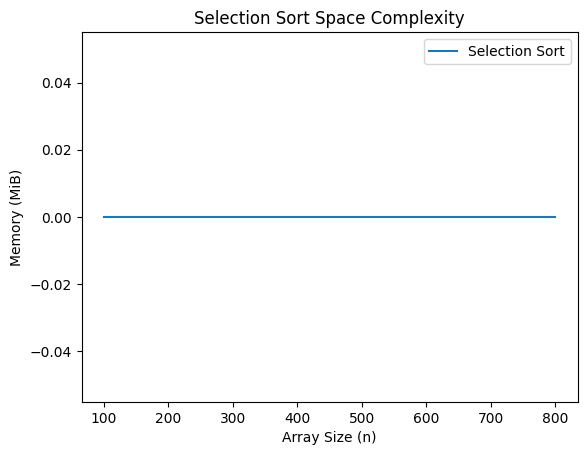

In [31]:
selection_mem = [measure_memory(selection_sort, random_array(n)) for n in inputs]

plot_graph(inputs, [selection_mem],
           ["Selection Sort"],
           "Selection Sort Space Complexity",
           xlabel="Array Size (n)", ylabel="Memory (MiB)")

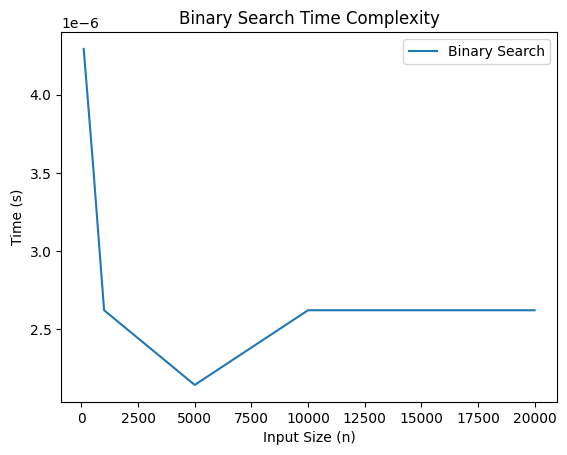

In [32]:
# Test Binary Search
inputs = [100, 500, 1000, 5000, 10000, 20000]

def sorted_array(n):
    return list(range(n))  # sorted array [0,1,2,...,n-1]

binary_search_times = []
for n in inputs:
    arr = sorted_array(n)
    x = random.randint(0, n-1)   # pick a random element to search
    t = measure_time(binary_search, arr, x)
    binary_search_times.append(t)

# Plot Binary Search graph
plot_graph(inputs, [binary_search_times],
           ["Binary Search"],
           "Binary Search Time Complexity",
           xlabel="Input Size (n)",
           ylabel="Time (s)")

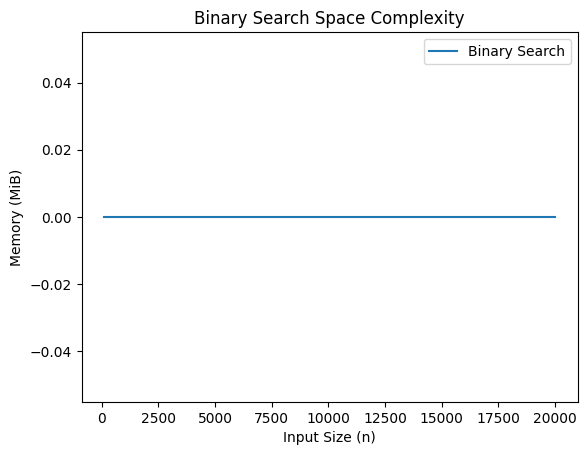

In [33]:
binary_search_memory = []
for n in inputs:
    arr = sorted_array(n)
    x = random.randint(0, n-1)
    mem = measure_memory(binary_search, arr, x)
    binary_search_memory.append(mem)

# Plot memory usage
plot_graph(inputs, [binary_search_memory],
           ["Binary Search"],
           "Binary Search Space Complexity",
           xlabel="Input Size (n)",
           ylabel="Memory (MiB)")